# K-Means Algorithm and RFM Scoring as a Combined Strategy for Efficient Customer Segmentation in the Retail Market


**Abstract**

This report presents a methodological proposal that combines the **K-Means** algorithm with a scoring system based on the **recency (R)**, **frequency (F)**, and **monetary value (M)** variables using the **Northwind** database for customer segmentation. First, we present the procedure developed to acquire and preprocess the data using the Python programming language. We then introduce the design and implementation of the **RFM** scoring scheme, demonstrating how this system can value customers based on their purchasing behavior. Next, we briefly discuss the application of the unsupervised learning algorithm K-Means to perform customer segmentation and introduce an innovative statistical proposal to weight the scores in the three individual directions for each cluster. Finally, we explain how, by comparing these centroids with the global centroid of the dataset, it is possible to categorize customers effectively.

**Keywords**: RFM Scoring, K-Means algorithm, clustering.

## Introduction

The ability to understand and segment customers has become a crucial factor for corporate success. The advent of the digital age has triggered an unprecedented explosion of data, providing a unique and significant opportunity to analyze consumer behavior and make informed decisions to enhance the customer experience. Leveraging this opportunity poses a challenge that can be optimally addressed through the implementation of machine learning (**ML**) algorithms in conjunction with business intelligence (**BI**) methods.

In this context, the introduction of a scoring system based on buyer behavior, which categorizes customers, allows for the development of effective commercial and marketing strategies. A well-known scoring system is based on a methodology that evaluates customer behavior in terms of recency, frequency, and monetary value. However, this system alone has certain limitations, such as the inability to detect patterns for grouping customers with similar behaviors or to assign weights to the **R**, **F**, and **M** variables based on robust statistical protocols rather than human judgment.

In this sense, the use of unsupervised learning algorithms can address the inherent shortcomings of the **RFM** method. Combining both approaches can create a powerful synergy that adds significant value to the business. Therefore, the objective of this project is to integrate the **K-Means** algorithm with an **RFM** system to achieve effective customer segmentation and categorization in the retail sector.

Clustering will allow for the identification of homogeneous groups of customers with similar characteristics, while **RFM** scoring will provide a detailed assessment of transaction recency, purchase frequency, and associated monetary value. The combination of these two methodologies will offer deeper insights into customer behavior patterns, enabling personalized **marketing**, **retention**, and **loyalty** strategies.

Throughout this project, we will present the foundations of the methodology used in the joint implementation of **K-Means** and the developed scoring system.

## Data preprocessing

### Northwind Database Analysis

[**Northwind Database**](https://en.wikiversity.org/wiki/Database_Examples/Northwind#SQL_Scripts): The Northwind database is a sample database that has been widely used in the industry and software development community. Originally created by Microsoft, it serves as a demonstration of the capabilities of Microsoft Access and Microsoft SQL Server. Northwind simulates a database for a fictional company that sells products to customers and manages orders, inventory, employees, etc.

The Northwind database contains several tables representing different aspects of a company, such as products, customers, orders, employees, suppliers, categories, etc. It is commonly used for learning, demonstration, and testing purposes in database and software development applications and courses.

Northwind has been adapted for various database management systems, including Microsoft SQL Server, MySQL, PostgreSQL, SQLite, among others. Versions of Northwind may vary slightly depending on the database management system used, but they maintain the same basic structure and sample data.

In summary, the Northwind database is a useful tool for practicing and learning about database design and management, as well as for developing and testing applications that require a sample database.

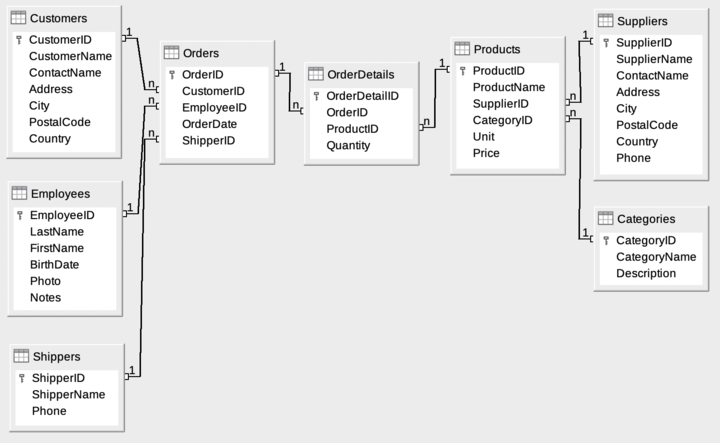

In [9]:
# ================
# Import libraries
# ================

# Módulos generales
import sqlite3
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time
from datetime import datetime
# -------------------------------------
from scipy.stats import boxcox
from scipy.stats import skew

# Evitar sugerencias de código
import warnings
warnings.filterwarnings('ignore')

# Configurar Pandas para desplegar completamente el DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Módulos de aprendizaje estadístico
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [10]:
# ==============================================
# Commands to run scripts in SLite from terminal
# ==============================================

# Connect to sqlite: `sqlite3`
# Run scripts: `.read file.sql`
# Quit sqlite3: `.quit`, `.exit` or `'ctrl + d'`
# Clear the console: ``ctrl + l'`
# After a statement in SQL you must place `;`
# Create or connect to a database: `sqlite3 file.db` (or connect to sqlite and run `.open file.db`)

# ============================================
# Run scripts in SQLite from Jupyter Notebooks
# ============================================

# Connect to the database (or create it if it doesn't exist)
# connection = sqlite3.connect('northwind.db')

# Create a cursor to execute SQL commands
# cursor = connection.cursor()

# Read the SQL script
# with open('populate_northwind_db.sql', 'r') as file:
#    sql_script = file.read()

# Execute the SQL script
# cursor.executescript(sql_script)

# Commit the changes
# connection.commit()

# Close the connection
# connection.close()

# print("Script executed successfully. Northwind database has been created.")

In [11]:
# Connect to the Northwind database
conn = sqlite3.connect('northwind.db')

# List of tables to convert into DataFrames
tables = [
    'Categories', 'Customers', 'Employees', 'OrderDetails',
    'Orders', 'Products', 'Shippers', 'Suppliers'
]

# Dictionary to store the DataFrames
dataframes = {}

# Create a DataFrame for each table and store it in the dictionary
for table in tables:
    query = f"SELECT * FROM {table}"
    dataframes[table] = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

In [12]:
# Display the first records of each DataFrame
for table, df in dataframes.items():
    title = f"DataFrame for {table}:"
    separator = "=" * len(title)
    print(f"\n{title}")
    print(separator)
    display(df.head())


DataFrame for Categories:


,CategoryID,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"



DataFrame for Customers:


,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la ConstituciÃ³n 2222,MÃ©xico D.F.,5021,Mexico
2,3,Antonio Moreno TaquerÃ­a,Antonio Moreno,Mataderos 2312,MÃ©xico D.F.,5023,Mexico
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
4,5,Berglunds snabbkÃ¶p,Christina Berglund,BerguvsvÃ¤gen 8,LuleÃ¥,S-958 22,Sweden



DataFrame for Employees:


,EmployeeID,LastName,FirstName,BirthDate,Photo,Notes
0,1,Davolio,Nancy,1968-12-08,EmpID1.pic,Education includes a BA in psychology from Col...
1,2,Fuller,Andrew,1952-02-19,EmpID2.pic,Andrew received his BTS commercial and a Ph.D....
2,3,Leverling,Janet,1963-08-30,EmpID3.pic,Janet has a BS degree in chemistry from Boston...
3,4,Peacock,Margaret,1958-09-19,EmpID4.pic,Margaret holds a BA in English literature from...
4,5,Buchanan,Steven,1955-03-04,EmpID5.pic,Steven Buchanan graduated from St. Andrews Uni...



DataFrame for OrderDetails:


,OrderDetailID,OrderID,ProductID,Quantity
0,1,10248,11,12
1,2,10248,42,10
2,3,10248,72,5
3,4,10249,14,9
4,5,10249,51,40



DataFrame for Orders:


,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
0,10248,90,5,1996-07-04,3
1,10249,81,6,1996-07-05,1
2,10250,34,4,1996-07-08,2
3,10251,84,3,1996-07-08,1
4,10252,76,4,1996-07-09,2



DataFrame for Products:


,ProductID,ProductName,SupplierID,CategoryID,Unit,Price
0,1,Chais,1,1,10 boxes x 20 bags,18.00
1,2,Chang,1,1,24 - 12 oz bottles,19.00
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35



DataFrame for Shippers:


,ShipperID,ShipperName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931



DataFrame for Suppliers:


,SupplierID,SupplierName,ContactName,Address,City,PostalCode,Country,Phone
0,1,Exotic Liquid,Charlotte Cooper,49 Gilbert St.,Londona,EC1 4SD,UK,(171) 555-2222
1,2,New Orleans Cajun Delights,Shelley Burke,P.O. Box 78934,New Orleans,70117,USA,(100) 555-4822
2,3,Grandma Kelly's Homestead,Regina Murphy,707 Oxford Rd.,Ann Arbor,48104,USA,(313) 555-5735
3,4,Tokyo Traders,Yoshi Nagase,9-8 Sekimai Musashino-shi,Tokyo,100,Japan,(03) 3555-5011
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Calle del Rosal 4,Oviedo,33007,Spain,(98) 598 76 54


In [13]:
# Shape of each DataFrame
for table, df in dataframes.items():
    title = f"Shape of {table}:"
    separator = "=" * len(title)
    print(f"\n{title}")
    print(separator)
    print(df.shape)


Shape of Categories:
(8, 3)

Shape of Customers:
(91, 7)

Shape of Employees:
(10, 6)

Shape of OrderDetails:
(518, 4)

Shape of Orders:
(196, 5)

Shape of Products:
(77, 6)

Shape of Shippers:
(3, 3)

Shape of Suppliers:
(29, 8)


In [14]:
# Data types of each DataFrame
for table, df in dataframes.items():
    title = f"Data types of {table}:"
    separator = "=" * len(title)
    print(f"\n{title}")
    print(separator)
    print(df.info())


Data types of Categories:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    8 non-null      int64 
 1   CategoryName  8 non-null      object
 2   Description   8 non-null      object
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes
None

Data types of Customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    91 non-null     int64 
 1   CustomerName  91 non-null     object
 2   ContactName   91 non-null     object
 3   Address       91 non-null     object
 4   City          91 non-null     object
 5   PostalCode    91 non-null     object
 6   Country       91 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.1+ KB
None

Data types of Employees:
<class 'pandas.c

### Extracting RFM Metrics from Northwind Database

In [16]:
# Get the current date in the format 'YYYY-MM-DD'
current_date = datetime.now().strftime('%Y-%m-%d')

# Connect to the Northwind database
conn = sqlite3.connect('northwind.db')

# Get the maximum order date from the Orders table
date_query = "SELECT MAX(OrderDate) AS max_date FROM Orders"
date_rfm = pd.read_sql_query(date_query, conn)
date_end = date_rfm['max_date'][0]

# Define the updated RFM query with dynamic current date
query = f'''
SELECT 
    c.CustomerID AS CustomerID,
    julianday('{date_end}') - julianday(MAX(o.OrderDate)) AS recency,
    COUNT(o.OrderID) AS frequency,
    SUM(od.Quantity * p.Price) AS monetary_value
FROM 
    Customers c
    JOIN Orders o ON c.CustomerID = o.CustomerID
    JOIN OrderDetails od ON o.OrderID = od.OrderID
    JOIN Products p ON od.ProductID = p.ProductID
GROUP BY 
    c.CustomerID;
'''

# Execute the query and save the results in a DataFrame
df_rfm = pd.read_sql_query(query, conn)

# Close the connection to the database
conn.close()

In [17]:
# Display the DataFrame
df_rfm.head()

,CustomerID,recency,frequency,monetary_value
0,2,147.0,2,111.00
1,3,77.0,1,504.00
2,4,58.0,5,1723.75
3,5,58.0,9,5406.90
4,7,7.0,13,15253.75


In [18]:
# Concise summary
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      74 non-null     int64  
 1   recency         74 non-null     float64
 2   frequency       74 non-null     int64  
 3   monetary_value  74 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.4 KB


In [19]:
# Summary statistics
df_rfm[['recency', 'frequency', 'monetary_value']].describe()

,recency,frequency,monetary_value
count,74.000000,74.000000,74.000000
mean,73.472973,7.000000,5221.949054
std,63.617268,5.814484,6747.855188
min,0.000000,1.000000,62.460000
25%,21.250000,3.000000,950.142500
50%,49.500000,5.000000,2381.500000
75%,130.500000,9.000000,5756.100000
max,223.000000,35.000000,35631.210000


In [20]:
# Check for duplicate CustomerID values
duplicates = df_rfm[df_rfm.duplicated(subset='CustomerID', keep=False)]

# Display the duplicates if any
if not duplicates.empty:
    print("Duplicate CustomerID values found:")
    print(duplicates)
else:
    print("No duplicate CustomerID values found.")

No duplicate CustomerID values found.


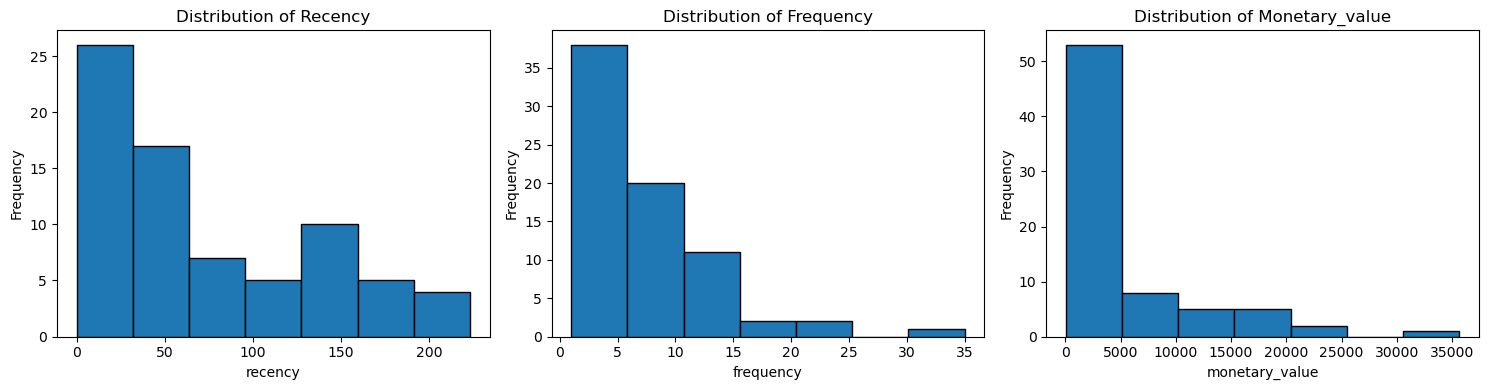

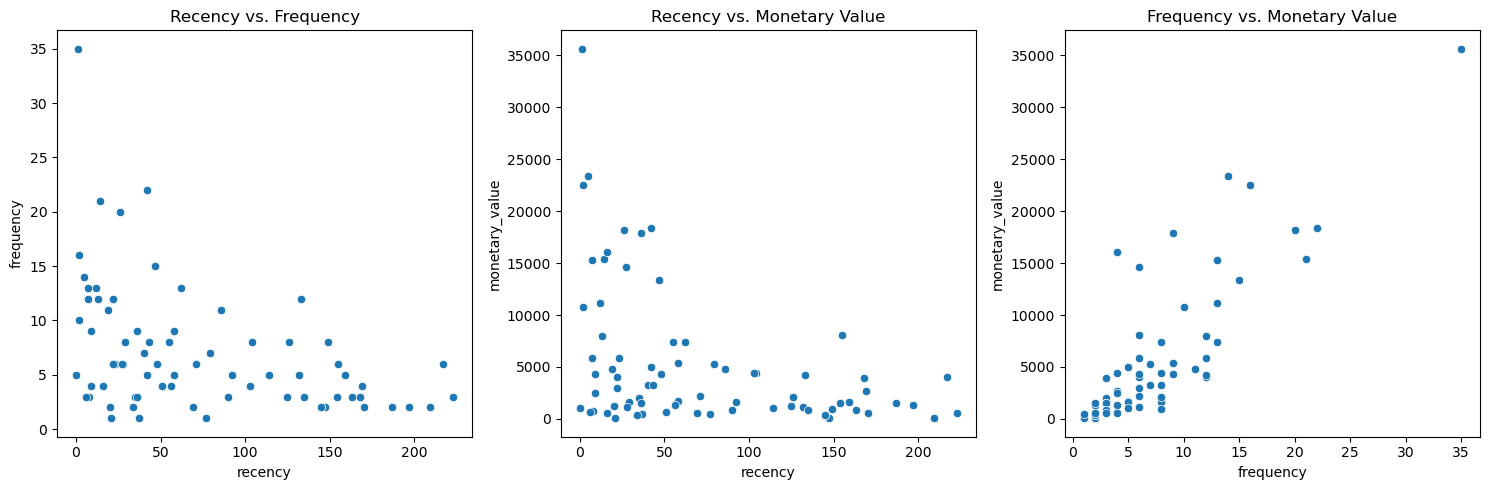

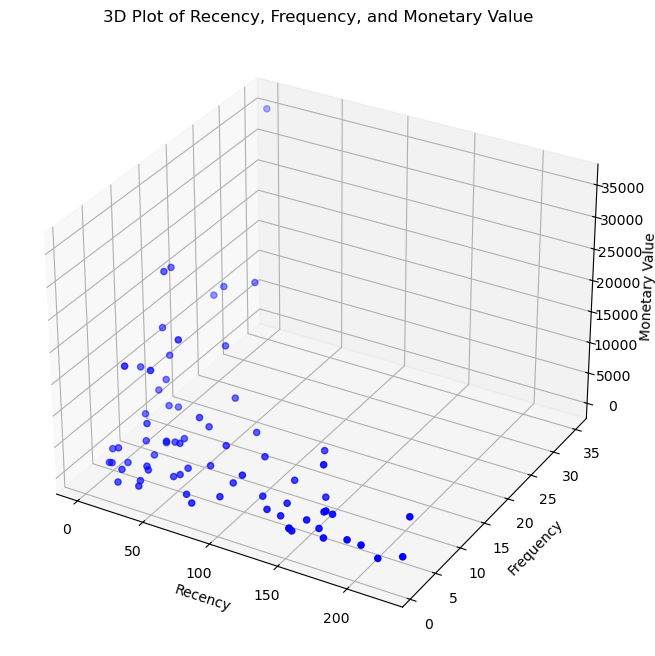

<<<<<<<<<<<<<<<<<< * >>>>>>>>>>>>>>>>>>
Skewness - Mean - Standard Deviation
skew(Recency) = 0.7221
skew(Frequency) = 2.128
skew(Monetary Value) = 2.1508
---------------------------------------
mean(Recency) = 73.473
mean(Frequency) = 7.0
mean(Monetary Value) = 5221.9491
---------------------------------------
std(Recency) = 63.6173
std(Frequency) = 5.8145
std(Monetary Value) = 6747.8552
<<<<<<<<<<<<<<<<<< * >>>>>>>>>>>>>>>>>>


In [21]:
# Assuming input_data is the DataFrame with RFM data
input_data = df_rfm
input_data_copy = df_rfm.copy()

# RFM Charts

# Sturges' Rule for determining the number of bins in histograms
number_bins = 1 + int(np.log2(len(input_data['recency'])))

# Columns to visualize
columns_to_visualize = ['recency', 'frequency', 'monetary_value']

# Histograms
plt.figure(figsize=(15, 4))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(1, len(columns_to_visualize), i)
    plt.hist(input_data[column], bins=number_bins, edgecolor='black')
    plt.title('Distribution of ' + column.capitalize())
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Scatter Plots
plt.figure(figsize=(15, 5))

# Scatter plot of Recency vs. Frequency
plt.subplot(1, 3, 1)
sns.scatterplot(data=input_data, x='recency', y='frequency')
plt.title('Recency vs. Frequency')

# Scatter plot of Recency vs. Monetary Value
plt.subplot(1, 3, 2)
sns.scatterplot(data=input_data, x='recency', y='monetary_value')
plt.title('Recency vs. Monetary Value')

# Scatter plot of Frequency vs. Monetary Value
plt.subplot(1, 3, 3)
sns.scatterplot(data=input_data, x='frequency', y='monetary_value')
plt.title('Frequency vs. Monetary Value')

plt.tight_layout()
plt.show()

# 3D Plot

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Variables for Recency, Frequency, and Monetary Value
R = input_data['recency']
F = input_data['frequency']
M = input_data['monetary_value']

# Create the 3D scatter plot
ax.scatter(R, F, M, c='b', marker='o')

# Axis labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')

# Title of the plot
plt.title('3D Plot of Recency, Frequency, and Monetary Value')

# Show the plot
plt.show()

# Skewness - Mean - Standard Deviation

print('<<<<<<<<<<<<<<<<<< * >>>>>>>>>>>>>>>>>>')
print('Skewness - Mean - Standard Deviation')
print('=======================================')

print("skew(Recency) =", np.round(skew(input_data['recency']), 4))
print("skew(Frequency) =", np.round(skew(input_data['frequency']), 4))
print("skew(Monetary Value) =", np.round(skew(input_data['monetary_value']), 4))

print('---------------------------------------')

print('mean(Recency) =', np.round(input_data['recency'].mean(), 4))
print('mean(Frequency) =', np.round(input_data['frequency'].mean(), 4))
print('mean(Monetary Value) =', np.round(input_data['monetary_value'].mean(), 4))

print('---------------------------------------')
      
print('std(Recency) =', np.round(input_data['recency'].std(), 4))
print('std(Frequency) =', np.round(input_data['frequency'].std(), 4))
print('std(Monetary Value) =', np.round(input_data['monetary_value'].std(), 4))

print('<<<<<<<<<<<<<<<<<< * >>>>>>>>>>>>>>>>>>')

### Design and Implementation of an RFM-Based Scoring System

In order to carry out the clustering process using the K-Means algorithm, we need to preprocess the data to meet the assumptions of normality. To address the skewness in the recency (R), frequency (F), and monetary value (M) variables, the Box-Cox transformation is applied. The Box-Cox transformation is a family of techniques widely used in statistics. These transformations are employed to mitigate statistical skewness, counteract unequal variances across predictor values, and fundamentally, to address non-linearity in relationships between variables, thereby improving their correlation. This approach is named after statisticians George E. P. Box and David Cox.

In our project, the transformation is performed using the `boxcox` function from the [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html) library. The formula for the Box-Cox transformation is given by:

$$
y(\lambda) = \left\{
  \begin{array}{ll}
    \frac{{x^\lambda - 1}}{{\lambda}}, & \text{if } \lambda \neq 0 \\
    \log(x), & \text{if } \lambda = 0
  \end{array}
\right.
$$

### Standardization of Transformed Variables

We must also standardize the transformed variables to ensure that the data is standardized for the K-Means algorithm, which uses Euclidean distance in its clustering process. This preprocessing step enhances the model's effectiveness by ensuring that the variables are comparable and contribute equally to the formation of clusters. The standardization of the variables is performed as follows:

$$
\left\{
\begin{array}{c}
S_R = \frac{R - \mu_R}{\sigma_R} \\
S_F = \frac{F - \mu_F}{\sigma_F} \\
S_M = \frac{M - \mu_M}{\sigma_M}
\end{array}
\right.
$$

In [24]:
# Box-Cox Transformation

# Apply Box-Cox to 'recency'
input_data['recency'], LambdaRecencia = boxcox(input_data['recency'] + 1)
# Apply Box-Cox to 'frecuencia'
input_data['frequency'], LambdaFrecuencia = boxcox(input_data['frequency'] + 1)
# Apply Box-Cox to 'monto'
input_data['monetary_value'], LambdaMonto = boxcox(input_data['monetary_value'] + 1)

# Standardization of variables

# Standardize 'recencia'
input_data['score_recency'] = (input_data['recency'] - 
    input_data['recency'].mean()) / input_data['recency'].std()

# Standardize 'frecuencia'
input_data['score_frequency'] = (input_data['frequency'] - 
    input_data['frequency'].mean()) / input_data['frequency'].std()

# Standardize 'monto'
input_data['score_monetary_value'] = (input_data['monetary_value'] - 
    input_data['monetary_value'].mean()) / input_data['monetary_value'].std()

# Display the first few rows of the transformed data
input_data.head()

,CustomerID,recency,frequency,monetary_value,score_recency,score_frequency,score_monetary_value
0,2,11.947060,0.988575,5.528836,1.113143,-1.275816,-2.126571
1,3,9.216646,0.648205,7.684806,0.368008,-2.060170,-1.158275
2,4,8.185883,1.511418,9.607563,0.086712,-0.070968,-0.294720
3,5,8.185883,1.853808,11.540837,0.086712,0.718039,0.573558
4,7,2.919137,2.061347,13.424939,-1.350592,1.196296,1.419751


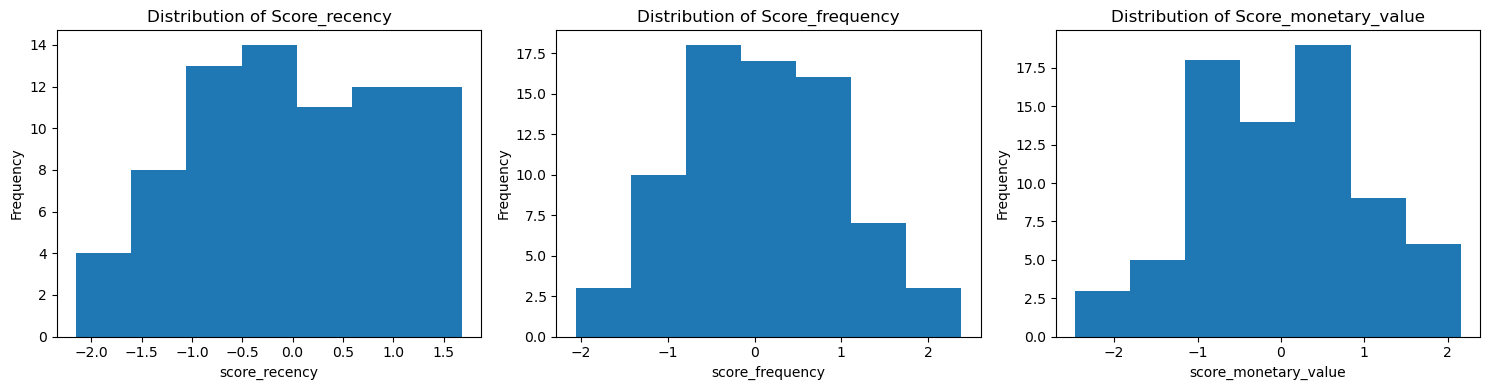

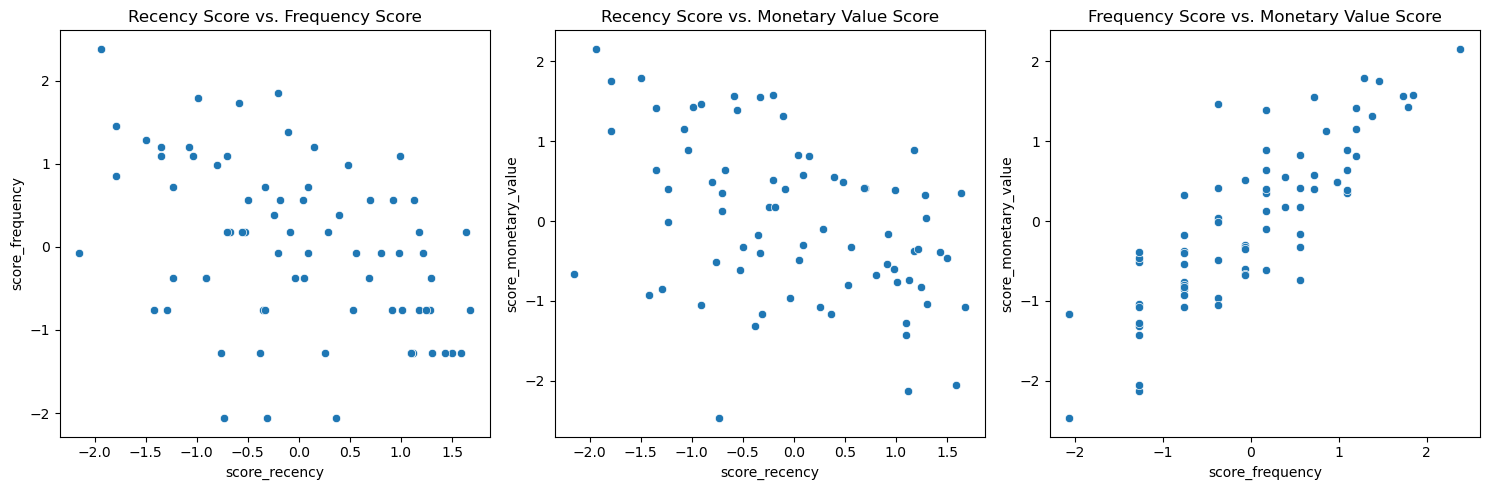

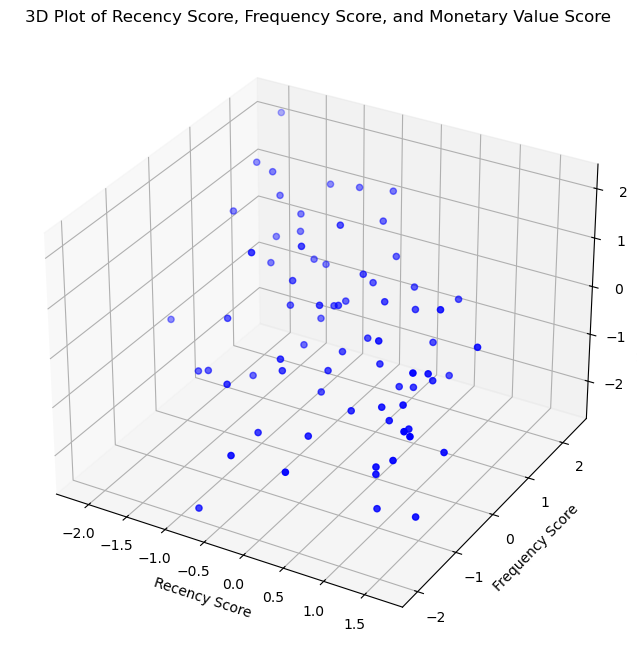

<<<<<<<<<<<<<<<<<< * >>>>>>>>>>>>>>>>>>
Skewness - Mean - Standard Deviation
skew(R Score) = -0.1241
skew(F Score) = 0.0239
skew(M Score) = -0.0124
---------------------------------------
mean(R Score) = 0.0
mean(F Score) = 0.0
mean(M Score) = 0.0
---------------------------------------
std(R Score) = 1.0
std(F Score) = 1.0
std(M Score) = 1.0
<<<<<<<<<<<<<<<<<< * >>>>>>>>>>>>>>>>>>


In [25]:
# RFM Visualization

# Sturges' Rule for bin number
number_bins = 1 + int(np.log2(len(input_data['score_recency'])))

# Columns to visualize
columns_to_visualize = ['score_recency', 'score_frequency', 'score_monetary_value']

# Histograms
plt.figure(figsize=(15, 4))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(1, len(columns_to_visualize), i)
    plt.hist(input_data[column], bins=number_bins)
    plt.title('Distribution of ' + column.capitalize())
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()

# Scatter Plots

plt.figure(figsize=(15, 5))

# Scatter plot of Recency vs. Frequency
plt.subplot(1, 3, 1)
sns.scatterplot(data=input_data, x='score_recency', y='score_frequency')
plt.title('Recency Score vs. Frequency Score')

# Scatter plot of Recency vs. Monetary Value
plt.subplot(1, 3, 2)
sns.scatterplot(data=input_data, x='score_recency', y='score_monetary_value')
plt.title('Recency Score vs. Monetary Value Score')

# Scatter plot of Frequency vs. Monetary Value
plt.subplot(1, 3, 3)
sns.scatterplot(data=input_data, x='score_frequency', y='score_monetary_value')
plt.title('Frequency Score vs. Monetary Value Score')

plt.tight_layout()
plt.show()

# 3D Plot

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Variables R, F, and M
s_r = input_data['score_recency']
s_f = input_data['score_frequency']
s_m = input_data['score_monetary_value']

# Create the 3D scatter plot
ax.scatter(s_r, s_f, s_m, c='b', marker='o')

# Labels for the axes
ax.set_xlabel('Recency Score')
ax.set_ylabel('Frequency Score')
ax.set_zlabel('Monetary Value Score')

# Title of the plot
plt.title('3D Plot of Recency Score, Frequency Score, and Monetary Value Score')

# Show the plot
plt.show()

# Skewness - Mean - Standard Deviation

print('<<<<<<<<<<<<<<<<<< * >>>>>>>>>>>>>>>>>>')
print('Skewness - Mean - Standard Deviation')
print('=======================================')

print("skew(R Score) =", np.round(skew(input_data['score_recency']), 4))
print("skew(F Score) =", np.round(skew(input_data['score_frequency']), 4))
print("skew(M Score) =", np.round(skew(input_data['score_monetary_value']), 4))

print('---------------------------------------')

print('mean(R Score) =', np.round(input_data['score_recency'].mean(), 4))
print('mean(F Score) =', np.round(input_data['score_frequency'].mean(), 4))
print('mean(M Score) =', np.round(input_data['score_monetary_value'].mean(), 4))

print('---------------------------------------')

print('std(R Score) =', np.round(input_data['score_recency'].std(), 4))
print('std(F Score) =', np.round(input_data['score_frequency'].std(), 4))
print('std(M Score) =', np.round(input_data['score_monetary_value'].std(), 4))

print('<<<<<<<<<<<<<<<<<< * >>>>>>>>>>>>>>>>>>')

## Clustering Process

The K-Means algorithm was implemented to carry out the clustering in this project

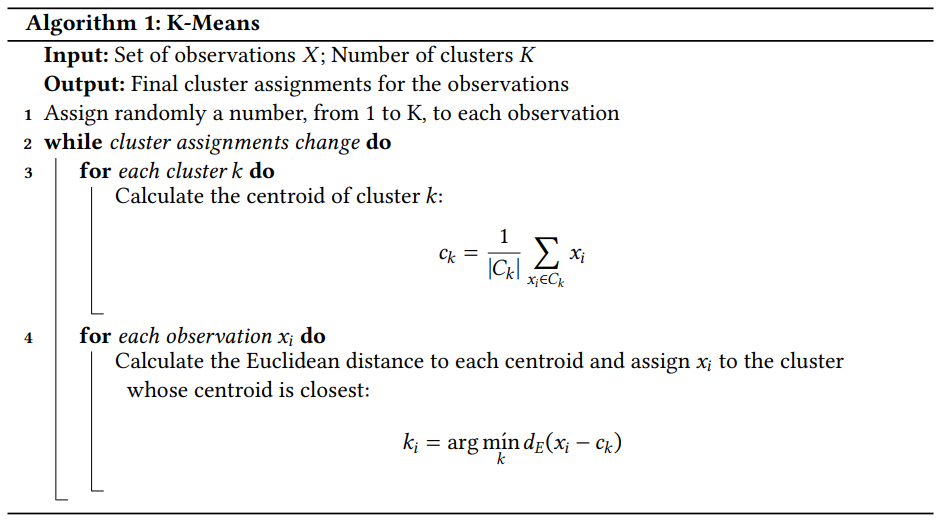

### Metrics for Determining the Optimal Number of Clusters

Determining the optimal number of clusters is a crucial aspect of implementing the K-Means algorithm, as it constitutes an essential hyperparameter of the model. To address this challenge, two complementary approaches were adopted. Firstly, various external validation measures were analyzed, including **inertia** (**using the elbow method**), **Calinski-Harabasz**, **Davies-Bouldin**, and **Silhouette**. The elbow method involves plotting the inertia against the number of clusters and selecting the point where there is no significant change in inertia, indicating the optimal number of clusters.

Secondly, a heuristic approach was employed by observing the number of customer categories the model identifies when iterating over different cluster values. Cluster values that did not produce a meaningful segmentation were discarded, meaning that when the increase in the number of clusters did not lead to the formation of additional groups and centroids within the same category were visually close, those values were excluded. This heuristic analysis provided additional validation for the hyperparameter selection, ensuring effective customer segmentation in our RFM dataset.

**Inertia (Elbow Method)**

Inertia, represented by the sum of squared distances between each point and the center of its assigned cluster, was the first metric evaluated using the elbow method. This method involves plotting inertia against the number of clusters and looking for the "elbow" in the curve, which indicates the point where adding more clusters no longer provides a significant improvement in reducing inertia.

**Calinski Harabasz - Davies Bouldin - Silhouette**

Additionally, internal cluster validation metrics were considered, including **Calinski Harabasz**, **Davies Bouldin**, and **Silhouette**. For a more detailed study of these indicators, refer to and consult the scikit-learn library [[Calinski Harabasz](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html), [Davies Bouldin](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html), [Silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)].

It is worth noting that due to the enormous amount of records in the tables, the indicators were calculated by sampling random subsets of the data and determining the number of clusters for which each indicator was maximized or minimized as appropriate.


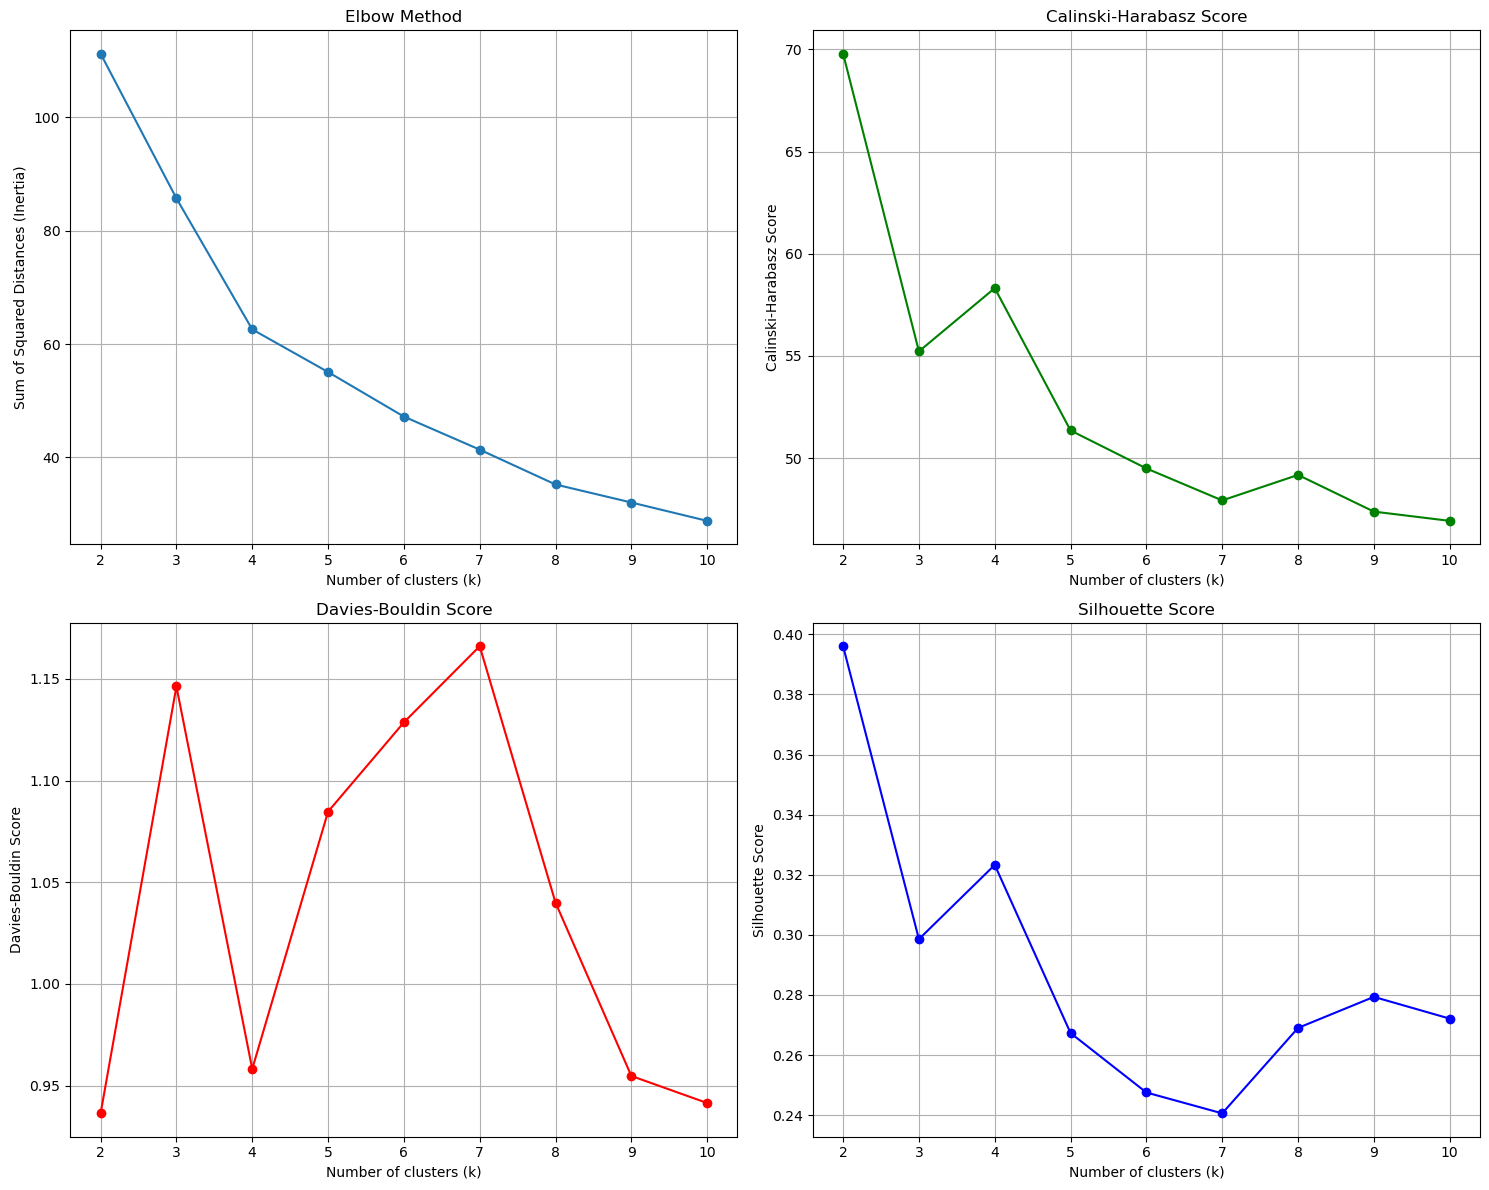

In [31]:
# Extract relevant columns for clustering
data = input_data[['score_recency', 'score_frequency', 'score_monetary_value']]

# Initialize lists to store the results
inertia_values = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
silhouette_scores = []

# Calculate the sum of squared distances (inertia) and other metrics for different values of k
for k in range(2, 11):  # Test k from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    
    # Inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    
    # Cluster labels
    labels = kmeans.labels_
    
    # Calinski-Harabasz score
    calinski_harabasz = calinski_harabasz_score(data, labels)
    calinski_harabasz_scores.append(calinski_harabasz)
    
    # Davies-Bouldin score
    davies_bouldin = davies_bouldin_score(data, labels)
    davies_bouldin_scores.append(davies_bouldin)
    
    # Silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette = silhouette_score(data, labels)
        silhouette_scores.append(silhouette)
    else:
        silhouette_scores.append(np.nan)

# Create a figure for the Elbow Method
plt.figure(figsize=(15, 12))

# Elbow Method
plt.subplot(2, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method')
plt.grid(True)

# Calinski-Harabasz Score
plt.subplot(2, 2, 2)
plt.plot(range(2, 11), calinski_harabasz_scores, marker='o', color='g')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score')
plt.grid(True)

# Davies-Bouldin Score
plt.subplot(2, 2, 3)
plt.plot(range(2, 11), davies_bouldin_scores, marker='o', color='r')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score')
plt.grid(True)

# Silhouette Score
plt.subplot(2, 2, 4)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

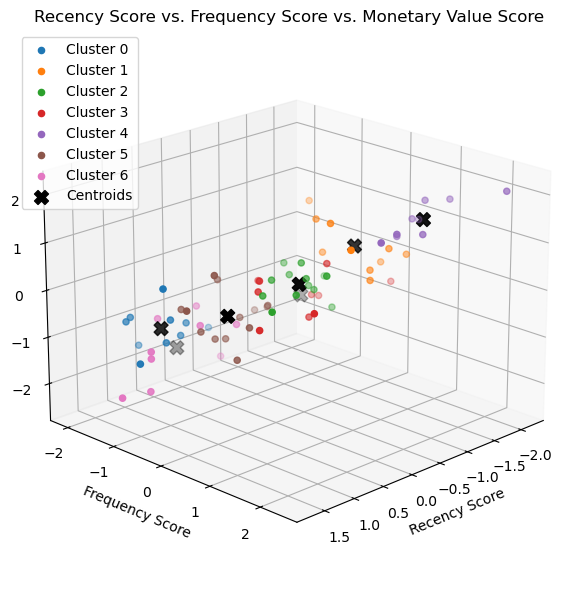

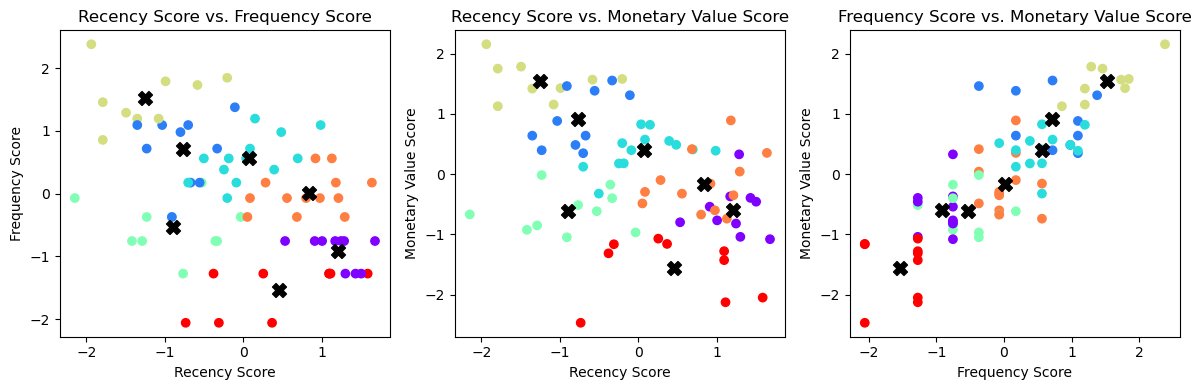

cluster
5    13
2    13
0    10
1    10
3    10
6     9
4     9
Name: count, dtype: int64


In [32]:
# Define the optimal number of clusters
optimal_cluster = 7

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_cluster, random_state=0)
cluster_labels = kmeans.fit_predict(data)

# Add the clustering results to the original DataFrame
input_data['cluster'] = cluster_labels

# Get centroids
centroids = kmeans.cluster_centers_

# 3D Plot: Recency vs. Frequency vs. Monetary Value
fig_3d = plt.figure(figsize=(8, 6))
ax_3d = fig_3d.add_subplot(111, projection='3d')

# Add scatter plot for each cluster
for cluster in range(optimal_cluster):
    cluster_data = input_data[input_data['cluster'] == cluster]
    ax_3d.scatter(cluster_data['score_recency'],
                  cluster_data['score_frequency'],
                  cluster_data['score_monetary_value'],
                  label=f'Cluster {cluster}', cmap='rainbow')

# Plot centroids with smaller markers
ax_3d.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
              s=100, c='black', marker='X', label='Centroids')

ax_3d.set_xlabel('Recency Score')
ax_3d.set_ylabel('Frequency Score')
ax_3d.set_zlabel('Monetary Value Score')
ax_3d.set_title('Recency Score vs. Frequency Score vs. Monetary Value Score')

# Set the rotation angles
zen = 20  # Zenith angle in degrees
azim = 45  # Azimuth angle in degrees
ax_3d.view_init(elev=zen, azim=azim)

# Add legend
ax_3d.legend()

plt.tight_layout()
plt.show()

# 2D scatter plots for Recency vs. Frequency, Recency vs. Monetary Value, and Frequency vs. Monetary Value

plt.figure(figsize=(12, 4))

# Recency vs. Frequency Plot
plt.subplot(131)
plt.scatter(input_data['score_recency'], 
            input_data['score_frequency'], 
            c=input_data['cluster'], cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], 
            s=100, c='black', marker='X', label='Centroids')
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.title('Recency Score vs. Frequency Score')

# Recency vs. Monetary Value Plot
plt.subplot(132)
plt.scatter(input_data['score_recency'], 
            input_data['score_monetary_value'], 
            c=input_data['cluster'], cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 2], 
            s=100, c='black', marker='X', label='Centroids')
plt.xlabel('Recency Score')
plt.ylabel('Monetary Value Score')
plt.title('Recency Score vs. Monetary Value Score')

# Frequency vs. Monetary Value Plot
plt.subplot(133)
plt.scatter(input_data['score_frequency'], 
            input_data['score_monetary_value'], 
            c=input_data['cluster'], cmap='rainbow')
plt.scatter(centroids[:, 1], centroids[:, 2], 
            s=100, c='black', marker='X', label='Centroids')
plt.xlabel('Frequency Score')
plt.ylabel('Monetary Value Score')
plt.title('Frequency Score vs. Monetary Value Score')

plt.tight_layout()
plt.show()

# Display the clusters and their sizes
cluster_sizes = input_data['cluster'].value_counts()
print(cluster_sizes)

### RFM Score Composition

The final RFM Score is calculated as a weighted combination of the individual scores of Recency ($S_R$), Frequency ($S_F$), and Monetary Value ($S_M$). The formula for the RFM Score ($S_{RFM}$) is expressed mathematically as:

$$
S_{RFM} = w_{S_R} \cdot S_R + w_{S_F} \cdot S_F + w_{S_M} \cdot S_M
$$

Here, $w_{S_R}$, $w_{S_F}$, $w_{S_M}$ are the weights assigned to each metric, subject to the constraint:

$$
w_{S_R} + w_{S_F} + w_{S_M} = 1
$$

These weights $(w_{S_R}, w_{S_F}, w_{S_M})$ are determined using the explained variances of each metric:

$$
\left\{
\begin{array}{c}
w_{S_R} = \frac{\sigma_{S_R}^2}{\sigma_{S_R}^2 + \sigma_{S_F}^2 + \sigma_{S_M}^2} \\
w_{S_F} = \frac{\sigma_{S_F}^2}{\sigma_{S_R}^2 + \sigma_{S_F}^2 + \sigma_{S_M}^2} \\
w_{S_M} = \frac{\sigma_{S_M}^2}{\sigma_{S_R}^2 + \sigma_{S_F}^2 + \sigma_{S_M}^2}
\end{array}
\right.
$$

This formulation allows for generalization to $N$ variables, meaning that the RFM Score ($S_{RFM}$) can be adapted to incorporate a broader set of metrics ($S_i$). The general equation is defined as:

$$
S_{RFM} = \sum_{i=1}^N w_{S_i} \cdot S_{i}
$$

where $w_{S_i}$ represents the weights associated with each individual metric, and the additional constraint is:

$$
\sum_{i=1}^N w_{S_i} = 1
$$

where

$$
w_{S_i} = \frac{\sigma_{S_i}^2}{\sum_{i=1}^N\sigma_{S_i}^2}
$$

This flexible approach allows for effective customization of the RFM Score according to the specific needs of the analysis, enabling the inclusion of a variable number of metrics to enhance or adjust customer categorization.

The definition of scores in each direction $(S_R, S_F, S_M)$ opens up the possibility of classifying the resulting clusters, which can be summarized in the detailed table below. This table provides a valuable framework for interpreting customer profiles in each category. The upward arrows (↑) indicate that the score in the corresponding direction for that type of customer is higher than the overall dataset average, while the downward arrows (↓) signify that the metric is lower than the overall average. This information is crucial for strategic decision-making, as it helps identify specific patterns and trends in customer behavior. For example, "**High Contribution Customers**" are characterized by a Recency Score ($\overline{S_R}$) below average, but with Frequency Score ($\overline{S_F}$) and Monetary Value Score ($\overline{S_M}$) above average, suggesting the importance of maintaining their engagement with the business. This classification provides valuable insights for designing tailored strategies aimed at retention, development, or acquisition of customers according to their specific profiles.

| Customer Type                        | $\overline{S_R}$  | $\overline{S_F}$  | $\overline{S_M}$  |
| -------------------------------------|-------------------|-------------------|-------------------|
| High Contribution Customers          | $\downarrow$      | $\uparrow$        | $\uparrow$        |
| Important Customers to Remember      | $\uparrow$        | $\uparrow$        | $\uparrow$        |
| Important Customers for Development  | $\downarrow$      | $\downarrow$      | $\uparrow$        |
| Important Customers for Retention    | $\uparrow$        | $\downarrow$      | $\uparrow$        |
| Potential Customers                  | $\downarrow$      | $\uparrow$        | $\downarrow$      |
| Recent Customers                     | $\downarrow$      | $\downarrow$      | $\downarrow$      |
| General Maintenance Customers        | $\uparrow$        | $\uparrow$        | $\downarrow$      |
| Low Activity Customers               | $\uparrow$        | $\downarrow$      | $\downarrow$      |

**Cluster classification criterion where $\uparrow$ means higher than the overall dataset average, while $\downarrow$ means lower than the overall dataset average.**

In [35]:
# Recency Score, Frequency Score, and Monetary Value Score variables
variables = ['score_recency', 'score_frequency', 'score_monetary_value']

# List to store variances for each cluster (corresponding to weights)
variances_by_cluster = []

# Iterate through each cluster
for cluster in input_data['cluster'].unique():
    cluster_data = input_data[input_data['cluster'] == cluster][variables]
    cluster_variances = cluster_data.var()
    variances_by_cluster.append(cluster_variances)

# Create a DataFrame with variances for each cluster
variance_df = pd.DataFrame(variances_by_cluster, index=input_data['cluster'].unique(), columns=variables)

# Normalize variances by cluster so they sum to 1
normalized_variances = variance_df.div(variance_df.sum(axis=1), axis=0)

var_r = input_data['score_recency'].std()**2
var_f = input_data['score_frequency'].std()**2
var_m = input_data['score_monetary_value'].std()**2

# Print explained variances
print('<<<<<<<<<<<<<<<<<<<<<<<< * >>>>>>>>>>>>>>>>>>>>>>>')

print("Explained variances by cluster:")
print("--------------------------------------------------")
print(normalized_variances)
print("==================================================")
print("Total Variances (as if they were a single cluster)")
print("--------------------------------------------------")
print('VarNorm(R) = ', var_r/(var_r + var_f + var_m))
print('VarNorm(F) = ', var_f/(var_r + var_f + var_m))
print('VarNorm(M) = ', var_m/(var_r + var_f + var_m))
print('<<<<<<<<<<<<<<<<<<<<<<<< * >>>>>>>>>>>>>>>>>>>>>>>')

<<<<<<<<<<<<<<<<<<<<<<<< * >>>>>>>>>>>>>>>>>>>>>>>
Explained variances by cluster:
--------------------------------------------------
   score_recency  score_frequency  score_monetary_value
6       0.613040         0.142993              0.243967
5       0.420004         0.173441              0.406555
2       0.493277         0.300622              0.206101
4       0.524206         0.317996              0.157798
0       0.315094         0.186129              0.498777
1       0.220175         0.446958              0.332867
3       0.579578         0.247672              0.172751
Total Variances (as if they were a single cluster)
--------------------------------------------------
VarNorm(R) =  0.33333333333333354
VarNorm(F) =  0.3333333333333333
VarNorm(M) =  0.33333333333333326
<<<<<<<<<<<<<<<<<<<<<<<< * >>>>>>>>>>>>>>>>>>>>>>>


In [36]:
# Add clustering results to the original DataFrame
input_data['cluster'] = cluster_labels

# Add the weights
for cluster in input_data['cluster'].unique():
    mask = input_data['cluster'] == cluster
    # Add the weight columns to each customer in the cluster
    input_data.loc[mask, 'omega_recency'] = normalized_variances.loc[cluster, 'score_recency']
    input_data.loc[mask, 'omega_frequency'] = normalized_variances.loc[cluster, 'score_frequency']
    input_data.loc[mask, 'omega_monetary_value'] = normalized_variances.loc[cluster, 'score_monetary_value']

# Insert the original columns at the beginning of the DataFrame
input_data.insert(1, 'R', input_data_copy['recency'])
input_data.insert(2, 'F', input_data_copy['frequency'])
input_data.insert(3, 'M', input_data_copy['monetary_value'])

# Add the S_{RFM} column to the DataFrame
input_data['rfm_score'] = 0.0
for cluster in input_data['cluster'].unique():
    mask = input_data['cluster'] == cluster
    input_data.loc[mask, 'rfm_score'] = (
        - input_data.loc[mask, 'score_recency'] * input_data.loc[mask, 'omega_recency'] +
          input_data.loc[mask, 'score_frequency'] * input_data.loc[mask, 'omega_frequency'] +
          input_data.loc[mask, 'score_monetary_value'] * input_data.loc[mask, 'omega_monetary_value']
    )

columns_order = ['CustomerID', 'R', 'F', 'M', 'cluster', 
                 'omega_recency', 'omega_frequency', 'omega_monetary_value',
                 'score_recency', 'score_frequency', 'score_monetary_value', 
                 'rfm_score']

# Reorder the columns in the DataFrame
input_data = input_data.reindex(columns=columns_order)

In [37]:
# Print the DataFrame
input_data.head()

,CustomerID,R,F,M,cluster,omega_recency,omega_frequency,omega_monetary_value,score_recency,score_frequency,score_monetary_value,rfm_score
0,2,147.0,2,111.00,6,0.613040,0.142993,0.243967,1.113143,-1.275816,-2.126571,-1.383647
1,3,77.0,1,504.00,6,0.613040,0.142993,0.243967,0.368008,-2.060170,-1.158275,-0.802775
2,4,58.0,5,1723.75,5,0.420004,0.173441,0.406555,0.086712,-0.070968,-0.294720,-0.168548
3,5,58.0,9,5406.90,2,0.493277,0.300622,0.206101,0.086712,0.718039,0.573558,0.291297
4,7,7.0,13,15253.75,4,0.524206,0.317996,0.157798,-1.350592,1.196296,1.419751,1.312440


In [38]:
# Calculate the mean values of score_recency, score_frequency, and score_monetary_value by cluster
means_by_cluster = input_data.groupby('cluster').agg({'score_recency': 'mean', 
                                                      'score_frequency': 'mean', 
                                                      'score_monetary_value': 'mean'})

# Calculate the overall means of score_recency, score_frequency, and score_monetary_value
MeanSr = input_data['score_recency'].mean()
MeanSf = input_data['score_frequency'].mean()
MeanSm = input_data['score_monetary_value'].mean()

# Define a function to assign a category
def assign_category(row):
    """
    Assigns a category to a customer based on their RFM values and the cluster and overall means.
    
    Args:
        row (pd.Series): A DataFrame row with RFM values and the assigned cluster.
        
    Returns:
        str: Category assigned to the customer.
    """
    ClusterMeans = means_by_cluster.loc[row['cluster']]  # Get the means of the corresponding cluster
    if (ClusterMeans['score_recency'] < MeanSr and 
        ClusterMeans['score_frequency'] > MeanSf and 
        ClusterMeans['score_monetary_value'] > MeanSm):
        return 'high contribution customers'
    elif (ClusterMeans['score_recency'] > MeanSr and 
          ClusterMeans['score_frequency'] > MeanSf and 
          ClusterMeans['score_monetary_value'] > MeanSm):
        return 'important customers to remember'
    elif (ClusterMeans['score_recency'] < MeanSr and 
          ClusterMeans['score_frequency'] < MeanSf and 
          ClusterMeans['score_monetary_value'] > MeanSm):
        return 'important customers for development'
    elif (ClusterMeans['score_recency'] > MeanSr and 
          ClusterMeans['score_frequency'] < MeanSf and 
          ClusterMeans['score_monetary_value'] > MeanSm):
        return 'important customers for retention'
    elif (ClusterMeans['score_recency'] < MeanSr and 
          ClusterMeans['score_frequency'] > MeanSf and 
          ClusterMeans['score_monetary_value'] < MeanSm):
        return 'potential customers'
    elif (ClusterMeans['score_recency'] < MeanSr and 
          ClusterMeans['score_frequency'] < MeanSf and 
          ClusterMeans['score_monetary_value'] < MeanSm):
        return 'recent customers'
    elif (ClusterMeans['score_recency'] > MeanSr and 
          ClusterMeans['score_frequency'] > MeanSf and 
          ClusterMeans['score_monetary_value'] < MeanSm):
        return 'general maintenance customers'
    elif (ClusterMeans['score_recency'] > MeanSr and 
          ClusterMeans['score_frequency'] < MeanSf and 
          ClusterMeans['score_monetary_value'] < MeanSm):
        return 'low activity customers'

# Apply the function to assign the category
input_data['category'] = input_data.apply(assign_category, axis=1)

In [39]:
# Function to assign values to the 'description' column
def assign_description(category):
    """
    Assigns a description based on the provided category.

    Parameters:
    - category (str): The category for which the description will be assigned.

    Returns:
    - str: The assigned description based on the category.
    """
    
    if category == 'high contribution customers':
        return 'r ↓ f ↑ m ↑'
    elif category == 'important customers to remember':
        return 'r ↑ f ↑ m ↑'
    elif category == 'important customers for development':
        return 'r ↓ f ↓ m ↑'
    elif category == 'important customers for retention':
        return 'r ↑ f ↓ m ↑'
    elif category == 'potential customers':
        return 'r ↓ f ↑ m ↓'
    elif category == 'recent customers':
        return 'r ↓ f ↓ m ↓'
    elif category == 'general maintenance customers':
        return 'r ↑ f ↑ m ↓'
    elif category == 'low activity customers':
        return 'r ↑ f ↓ m ↓'
    else:
        return ''  # Handle unspecified categories

# Apply the function to the 'category' column to create the new 'description' column
input_data['description'] = input_data['category'].apply(assign_description)

In [40]:
# Initialize the scaler
scaler = MinMaxScaler()

# Scale the RFM Score column
input_data['rfm_normalized_score'] = scaler.fit_transform(input_data[['rfm_score']])

In [41]:
# Print the DataFrame
input_data.head()

,CustomerID,R,F,M,cluster,omega_recency,omega_frequency,omega_monetary_value,score_recency,score_frequency,score_monetary_value,rfm_score,category,description,rfm_normalized_score
0,2,147.0,2,111.00,6,0.613040,0.142993,0.243967,1.113143,-1.275816,-2.126571,-1.383647,low activity customers,r ↑ f ↓ m ↓,0.072113
1,3,77.0,1,504.00,6,0.613040,0.142993,0.243967,0.368008,-2.060170,-1.158275,-0.802775,low activity customers,r ↑ f ↓ m ↓,0.226269
2,4,58.0,5,1723.75,5,0.420004,0.173441,0.406555,0.086712,-0.070968,-0.294720,-0.168548,general maintenance customers,r ↑ f ↑ m ↓,0.394584
3,5,58.0,9,5406.90,2,0.493277,0.300622,0.206101,0.086712,0.718039,0.573558,0.291297,important customers to remember,r ↑ f ↑ m ↑,0.516621
4,7,7.0,13,15253.75,4,0.524206,0.317996,0.157798,-1.350592,1.196296,1.419751,1.312440,high contribution customers,r ↓ f ↑ m ↑,0.787619


### Score Analysis

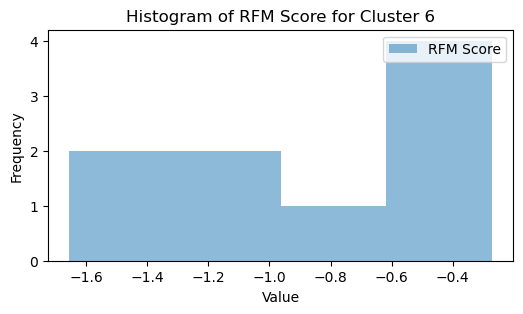

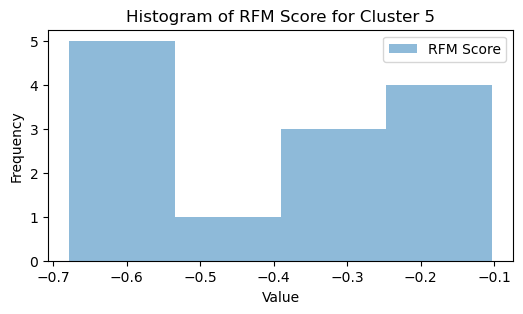

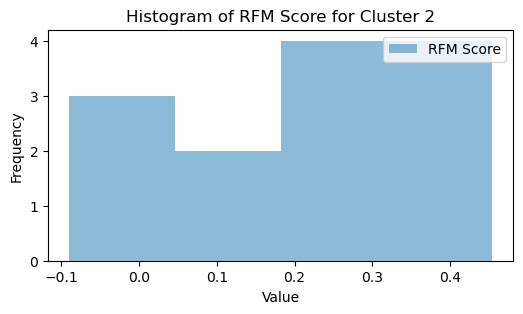

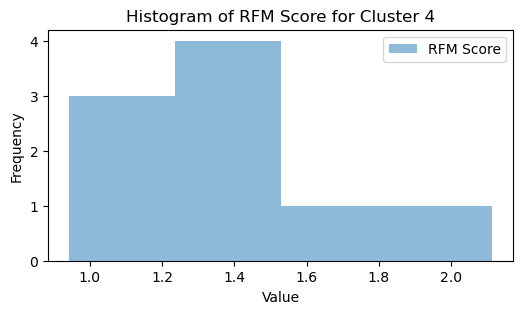

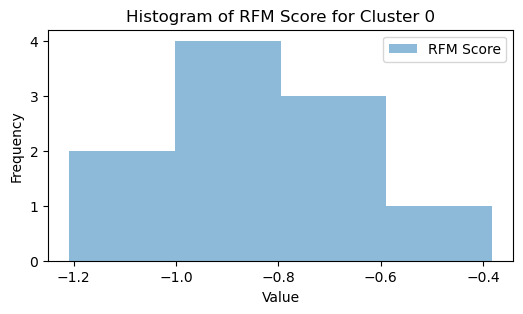

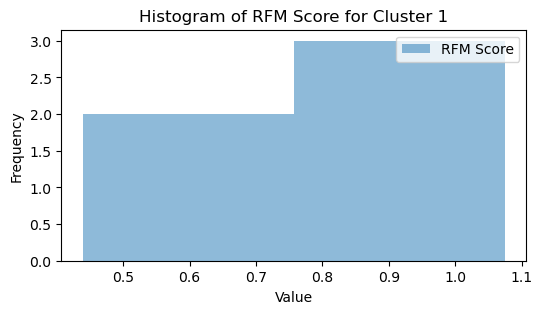

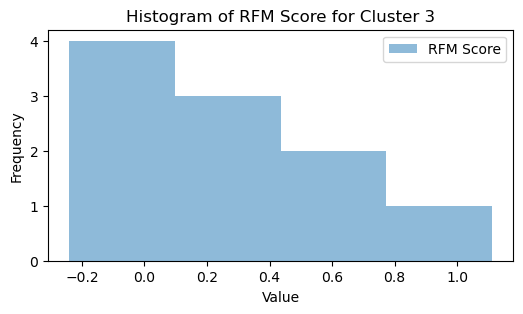

In [43]:
# Distribution of RFM Scores

# Create a histogram of normalized scoring for each cluster
for cluster in input_data['cluster'].unique():
    # Filter the DataFrame by cluster
    cluster_data = input_data[input_data['cluster'] == cluster]
    number_bins = 1 + int(np.log2(len(input_data[input_data['cluster'] == cluster])))
    
    # Create the histogram
    plt.figure(figsize=(6, 3))
    plt.hist(cluster_data['rfm_score'], bins=number_bins, alpha=0.5, label='RFM Score')
    
    # Customize the title and axis labels
    plt.title(f'Histogram of RFM Score for Cluster {cluster}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    
    # Display the histogram
    plt.show()

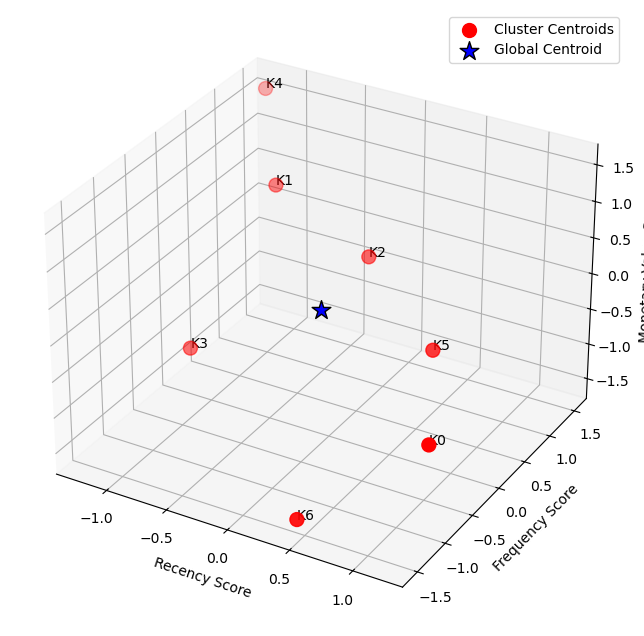

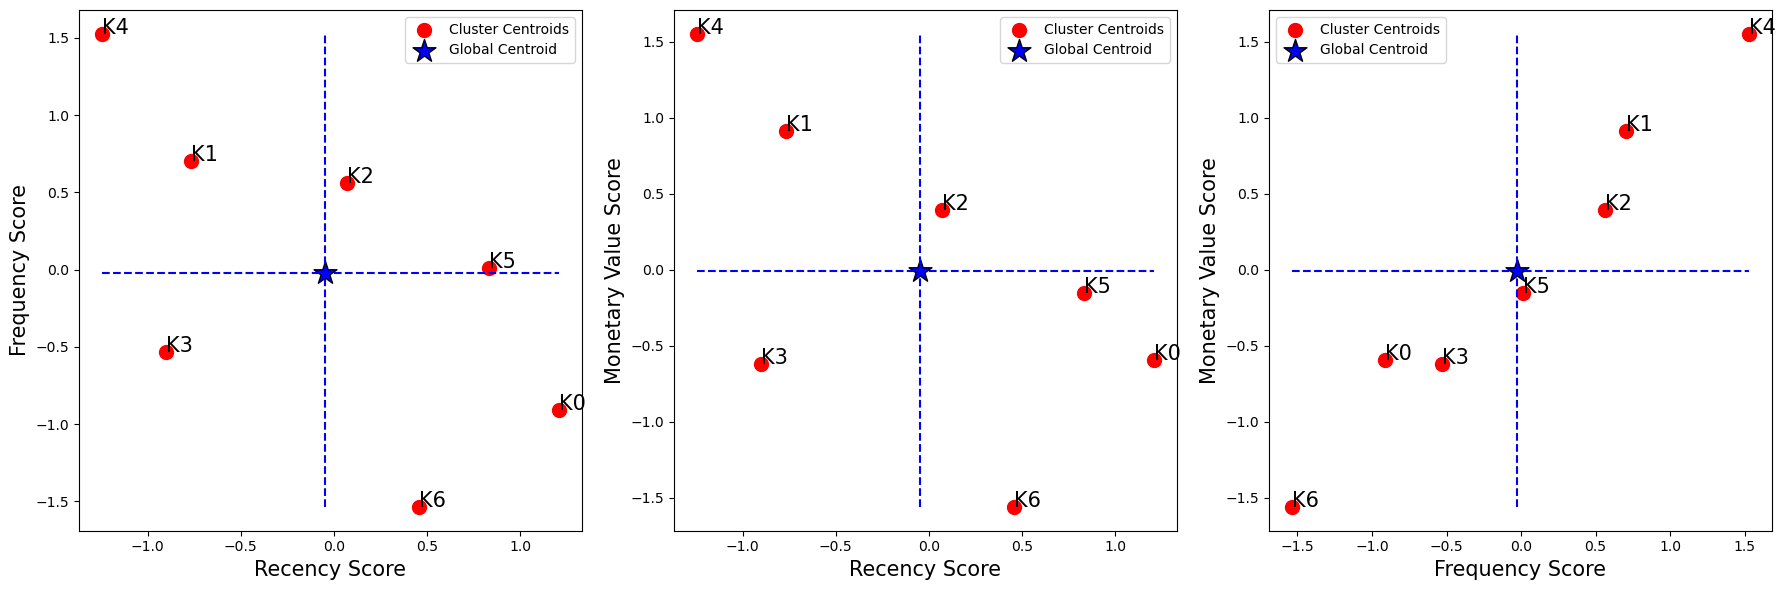

In [44]:
# Centroids in the Point Space

# Group by cluster
clustered_data = input_data[['score_recency', 
                             'score_frequency', 
                             'score_monetary_value', 
                             'cluster']].groupby('cluster').mean()

# Calculate the global centroid
global_centroid = clustered_data.mean()

# Adjust point size and axis label font size
point_size = 100
fontsize = 15

# 3D Plot

# Create the 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract centroid coordinates
x, y, z = clustered_data['score_recency'], clustered_data['score_frequency'], clustered_data['score_monetary_value']
ax.scatter(x, y, z, c='r', s=point_size, marker='o', label='Cluster Centroids')

# Add the global centroid
ax.scatter(global_centroid['score_recency'], 
           global_centroid['score_frequency'], 
           global_centroid['score_monetary_value'],
           c='b', s=200, marker='*', label='Global Centroid', edgecolors='k')

# Set axis labels
ax.set_xlabel('Recency Score')
ax.set_ylabel('Frequency Score')
ax.set_zlabel('Monetary Value Score')

# Add labels to the points
for i, txt in enumerate(clustered_data.index):
    ax.text(x[i], y[i], z[i], f'K{txt}')

# Add legend
ax.legend()

# Show the plot
plt.show()

# Projections

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# XY Projection
ax_xy = axes[0]
x, y = clustered_data['score_recency'], clustered_data['score_frequency']
ax_xy.scatter(x, y, c='r', s=point_size, marker='o', label='Cluster Centroids')
ax_xy.scatter(global_centroid['score_recency'], global_centroid['score_frequency'], 
              c='b', s=300, marker='*', label='Global Centroid', edgecolors='k')
ax_xy.set_xlabel('Recency Score', fontsize=fontsize)
ax_xy.set_ylabel('Frequency Score', fontsize=fontsize)
for i, txt in enumerate(clustered_data.index):
    ax_xy.text(x[i], y[i], f'K{txt}', fontsize=fontsize)
ax_xy.hlines(global_centroid['score_frequency'], min(x), max(x), colors='b', linestyles='dashed')
ax_xy.vlines(global_centroid['score_recency'], min(y), max(y), colors='b', linestyles='dashed')
ax_xy.legend()

# XZ Projection
ax_xz = axes[1]
x, z = clustered_data['score_recency'], clustered_data['score_monetary_value']
ax_xz.scatter(x, z, c='r', s=point_size, marker='o', label='Cluster Centroids')
ax_xz.scatter(global_centroid['score_recency'], global_centroid['score_monetary_value'], 
              c='b', s=300, marker='*', label='Global Centroid', edgecolors='k')
ax_xz.set_xlabel('Recency Score', fontsize=fontsize)
ax_xz.set_ylabel('Monetary Value Score', fontsize=fontsize)
for i, txt in enumerate(clustered_data.index):
    ax_xz.text(x[i], z[i], f'K{txt}', fontsize=fontsize)
ax_xz.hlines(global_centroid['score_monetary_value'], min(x), max(x), colors='b', linestyles='dashed')
ax_xz.vlines(global_centroid['score_recency'], min(z), max(z), colors='b', linestyles='dashed')
ax_xz.legend()

# YZ Projection
ax_yz = axes[2]
y, z = clustered_data['score_frequency'], clustered_data['score_monetary_value']
ax_yz.scatter(y, z, c='r', s=point_size, marker='o', label='Cluster Centroids')
ax_yz.scatter(global_centroid['score_frequency'], global_centroid['score_monetary_value'], c='b', s=300, marker='*', 
              label='Global Centroid', edgecolors='k')
ax_yz.set_xlabel('Frequency Score', fontsize=fontsize)
ax_yz.set_ylabel('Monetary Value Score', fontsize=fontsize)
for i, txt in enumerate(clustered_data.index):
    ax_yz.text(y[i], z[i], f'K{txt}', fontsize=fontsize)
ax_yz.hlines(global_centroid['score_monetary_value'], min(y), max(y), colors='b', linestyles='dashed')
ax_yz.vlines(global_centroid['score_frequency'], min(z), max(z), colors='b', linestyles='dashed')
ax_yz.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

### Output

In [46]:
# Copy the original DataFrame
output_data = input_data.copy()

# Reorder the columns
output_data = output_data[['CustomerID', 'R', 'F', 'M', 'category', 'rfm_normalized_score', 'description']]

# Rename the column
output_data = output_data.rename(columns={'rfm_normalized_score': 'score'})

In [47]:
# Print the first few rows
output_data.head()

,CustomerID,R,F,M,category,score,description
0,2,147.0,2,111.00,low activity customers,0.072113,r ↑ f ↓ m ↓
1,3,77.0,1,504.00,low activity customers,0.226269,r ↑ f ↓ m ↓
2,4,58.0,5,1723.75,general maintenance customers,0.394584,r ↑ f ↑ m ↓
3,5,58.0,9,5406.90,important customers to remember,0.516621,r ↑ f ↑ m ↑
4,7,7.0,13,15253.75,high contribution customers,0.787619,r ↓ f ↑ m ↑


In [48]:
# Download rfm output table
output_data.to_csv('rfm_dataset.csv', index=False)